# Multiple Linear Regression - Bike Sharing Assignment

## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***

1. Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
2. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Reading and Understanding the Data

In [1]:
#Imporitng the required package from the libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#Read the data from csv file
df = pd.read_csv('day.csv')

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### As observed, there are 730 rows and 16 columns in the data set with no null values in any of the columns.

# Step 2: Cleaning the Data

### Dropping the unwanted columns:-
- **'instant'** is just a row instance identifier.
- **'dteday'** has date format which is already extracted in columns for **'year'** & **'month'**.
- **'casual'** and **'registered'** variables are not necessary to be analysed separately since the focus is on **'cnt'** variable as our target. Additionally, **cnt = casual + registered**, i.e. count is already combining both the casual as well as registered users.

In [6]:
# Dropping the unwanted columns:- 'instant' has only index for the row, 'dteday' has date which can be compensated by year and month column,
df.drop(['instant','dteday', 'casual', 'registered'],axis=1,inplace=True)

In [7]:
#Encoding/mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
#Encoding/mapping the month column
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [9]:
#Encoding/mapping the weekday column
df.weekday = df.weekday.map({5:'sun',6:'mon',0:'tue',1:'wed',2:'thu',3:'fri',4:'sat'})

In [10]:
#Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [11]:
#Check the head of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


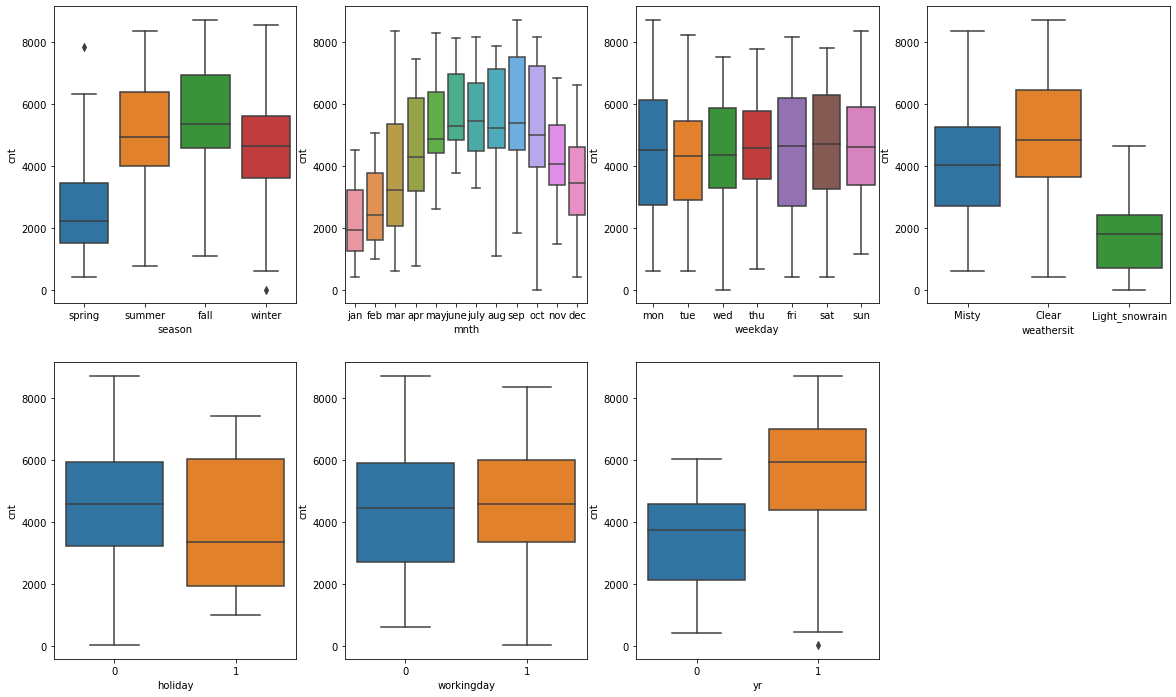

In [12]:
#Analysing the categorical columns to see how predictor variable stands against the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [13]:
#Function to create barplot related to categorical columns
def plot_cat_cols(column):
    plt.figure(figsize = (15,10))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='yr',palette='Set1')
    plt.show()

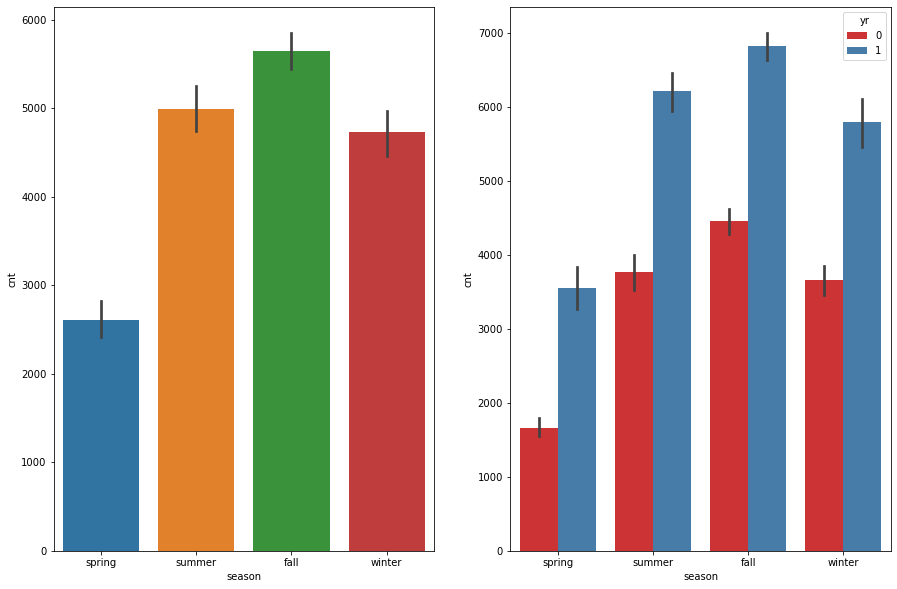

In [14]:
#Plotting visualization for season column
plot_cat_cols('season')

#### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

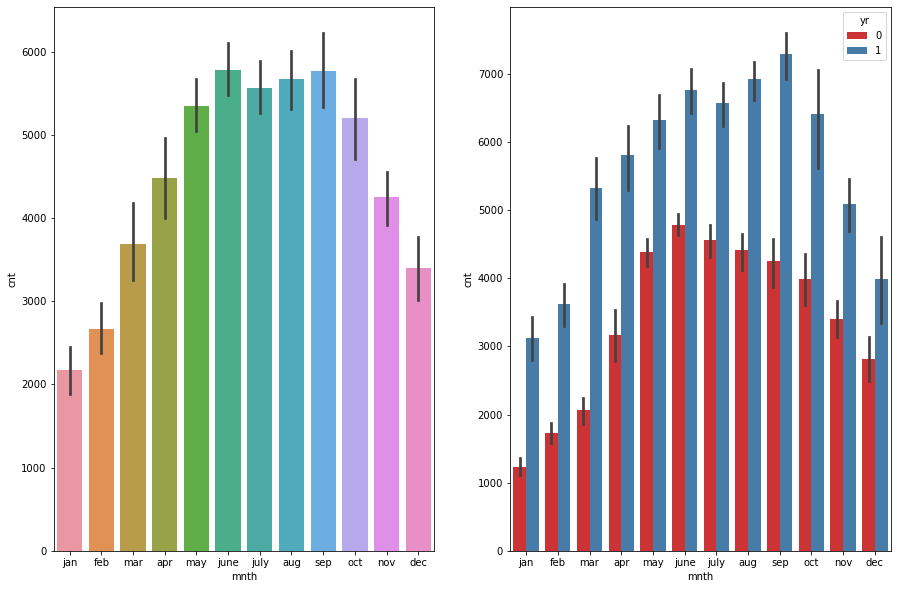

In [15]:
#Plotting visualization for month column
plot_cat_cols('mnth')

#### Period of May-Oct has seen the most number of bookings. Trend increases from the start of the year till mid of the year & subsequently decreases towards the end of the year. Number of booking for each month seems to have increased significantly from 2018 to 2019.

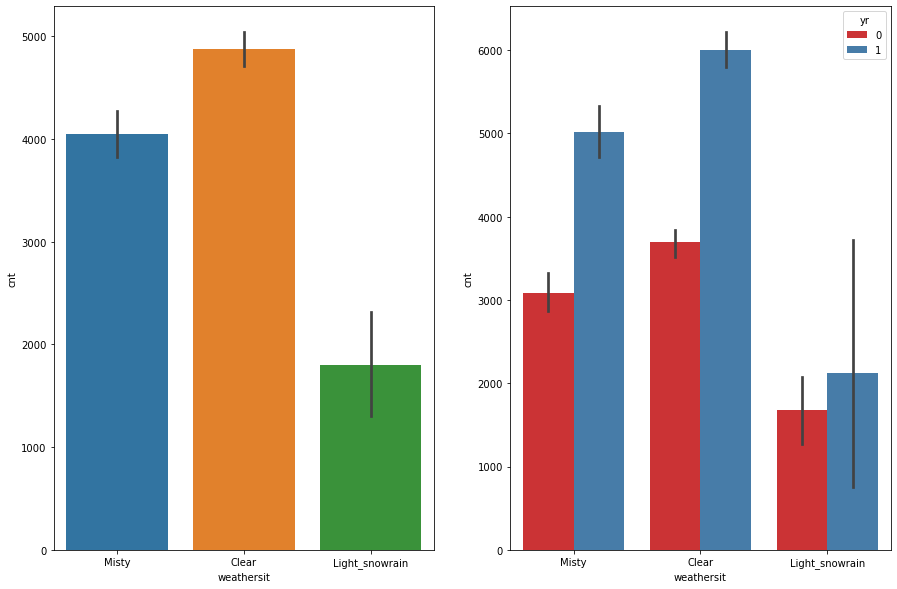

In [16]:
#Plotting visualization for weathersit column
plot_cat_cols('weathersit')

#### Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

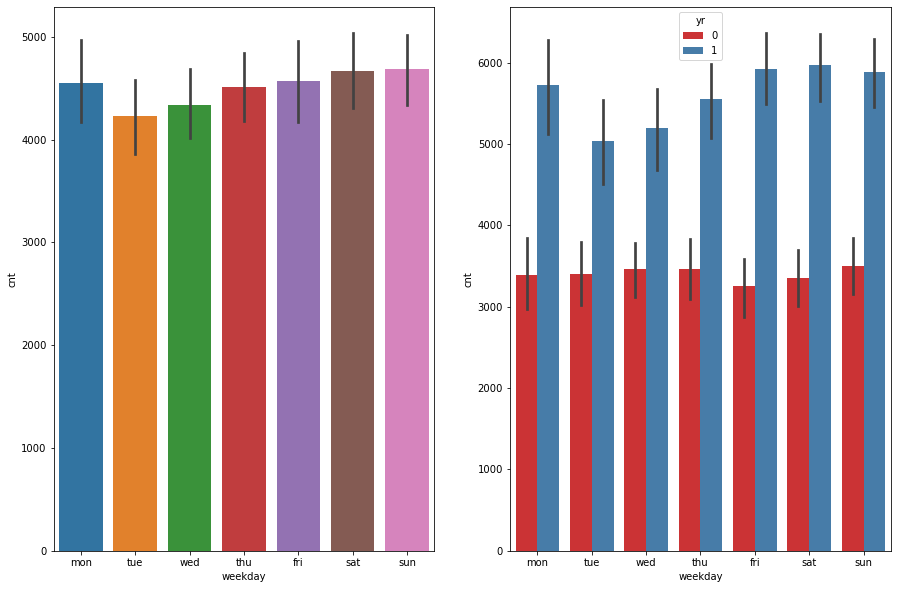

In [17]:
#Plotting visualization for weekday column
plot_cat_cols('weekday')

#### Fri, Sat and Sun have more number of bookings as compared to weekdays Mon-Thu.

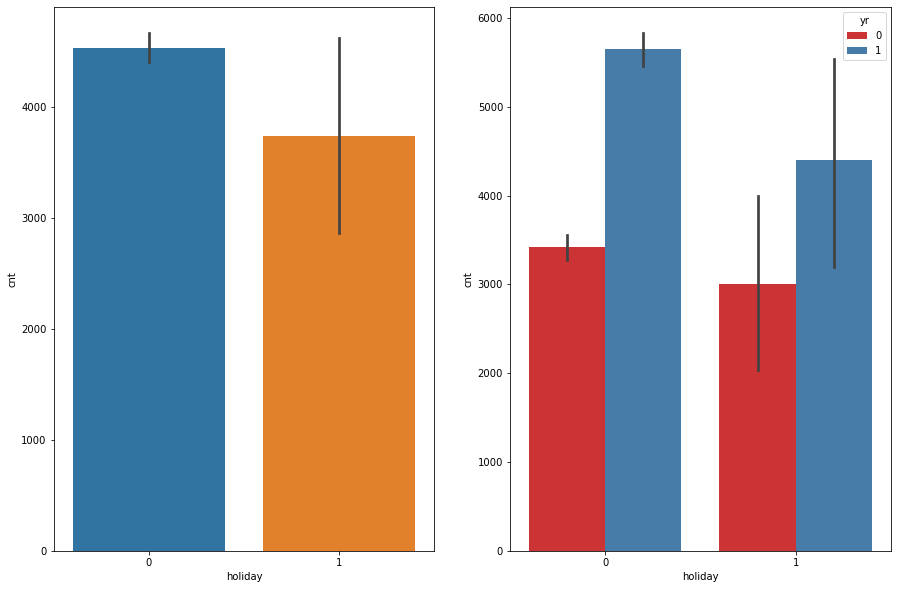

In [18]:
#Plotting visualization for holiday column
plot_cat_cols('holiday')

#### Naturally, we observe a dip in bookings when its a holiday, since on a holiday, people in the US prefer to stay at home and spend time with their family.

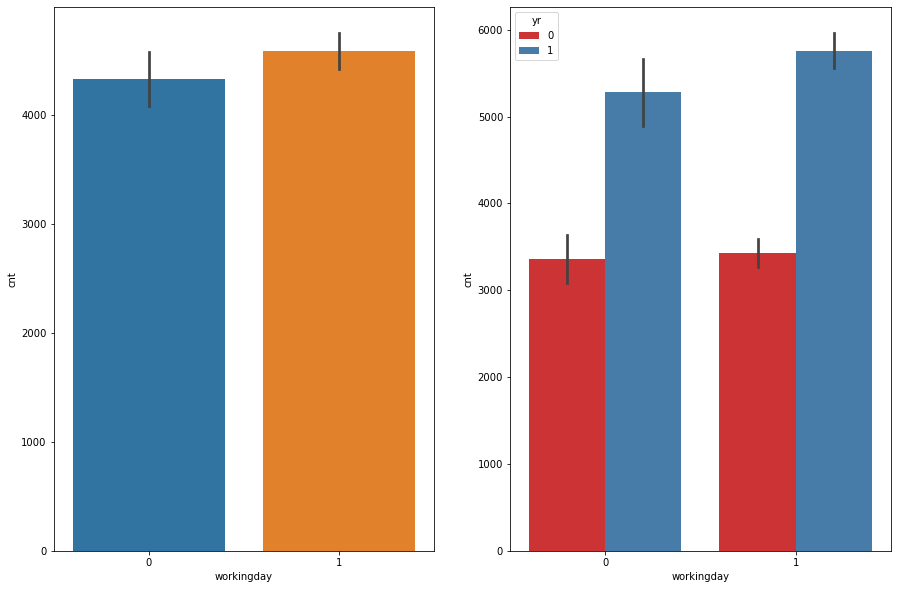

In [19]:
#Plotting visualization for workingday column
plot_cat_cols('workingday')

#### Booking seems almost equal either on working day or non-working day. However, the count has increased from 2018 to 2019.

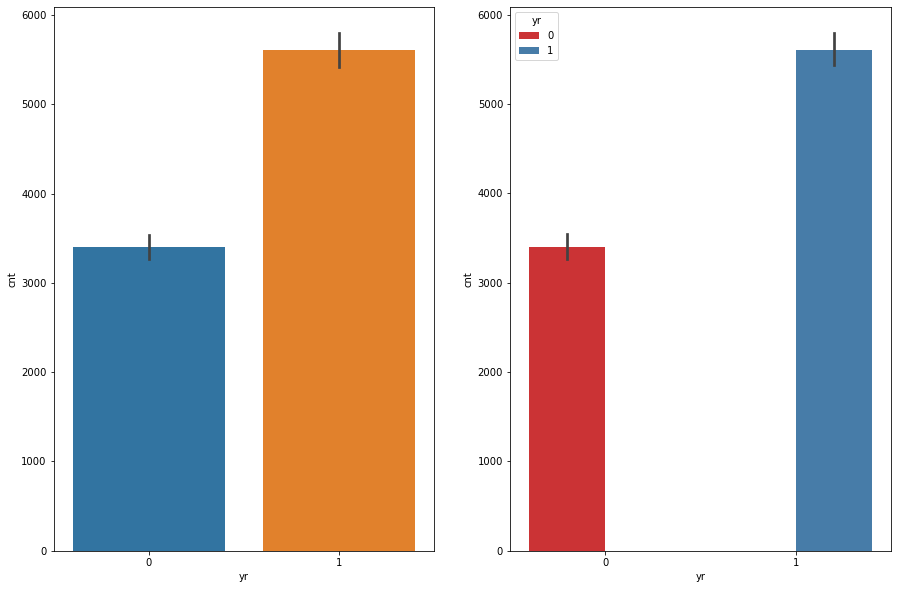

In [20]:
#Plotting visualization for year column
plot_cat_cols('yr')

#### 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

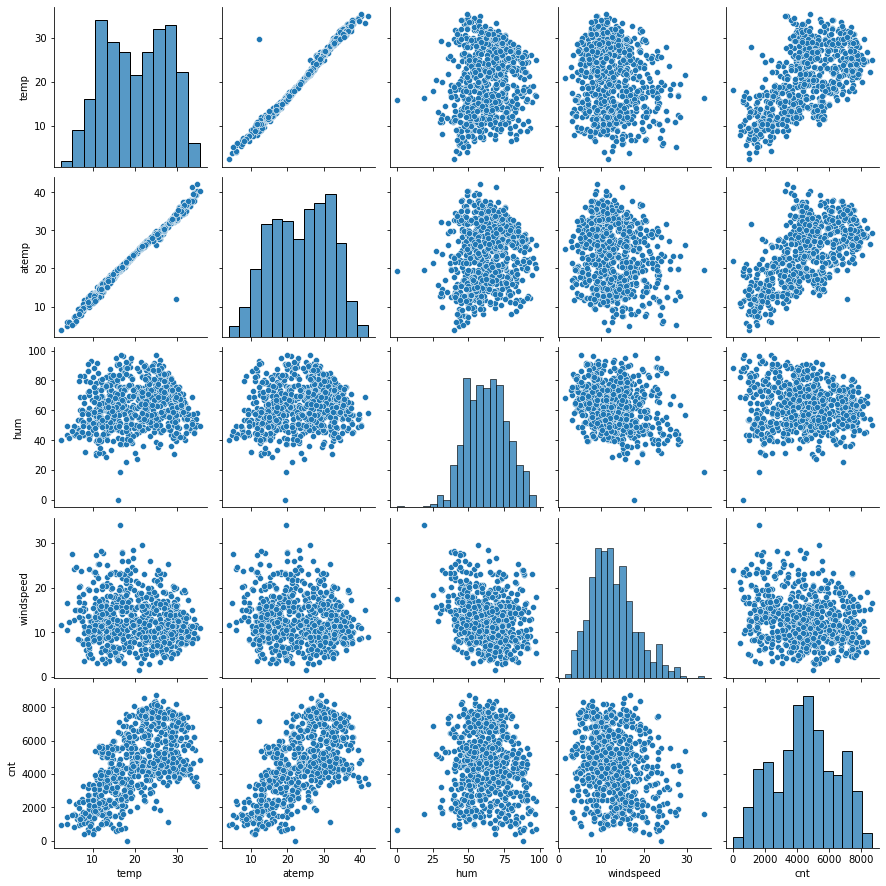

In [21]:
#Analysing/visualizing the numerical columns
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

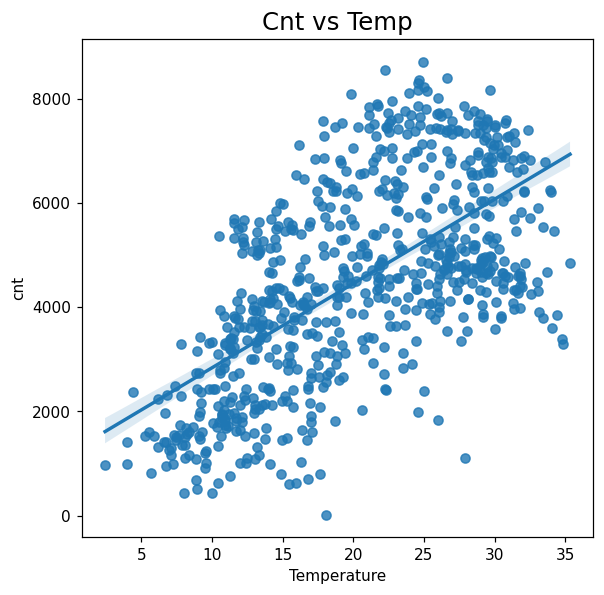

In [22]:
#Analysing/visualizing the Cnt vs Temp
plt.figure(figsize=(6,6),dpi=110)
plt.title("Cnt vs Temp", fontsize=16)
sns.regplot(data=df, y="cnt", x="temp")
plt.xlabel("Temperature")
plt.show()

**Demand for bikes is positively correlated to `temp`. We can see that `cnt` is linearly increasing with `temp` indicating linear relation.**

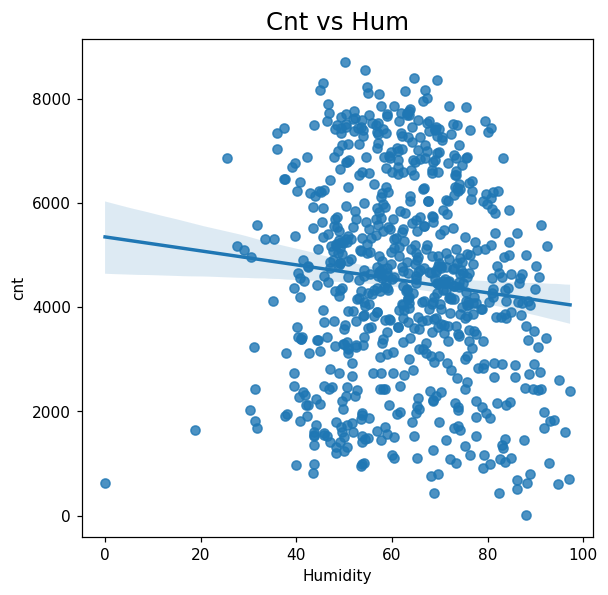

In [23]:
#Analysing/visualizing the Cnt vs Humidity
plt.figure(figsize=(6,6),dpi=110)
plt.title("Cnt vs Hum", fontsize=16)
sns.regplot(data=df, y="cnt", x="hum")
plt.xlabel("Humidity")
plt.show()

**Although we can see `cnt` decreasing with increase in `humidity`, the plot is more scattered around, indicating a weak linear relationship.**

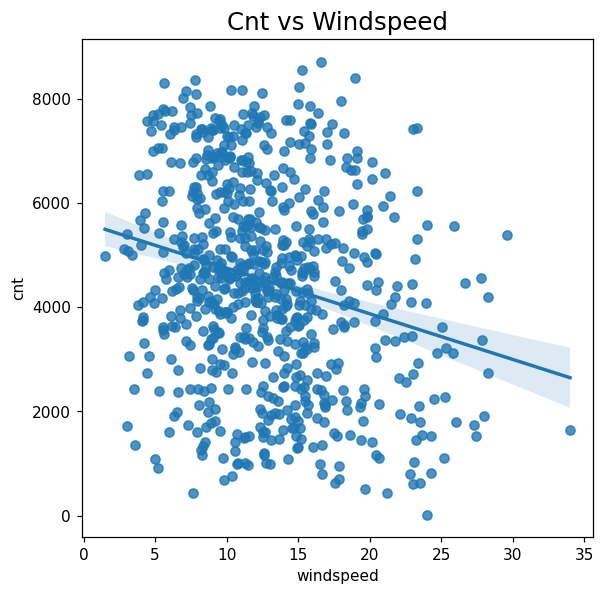

In [24]:
#Analysing/visualizing the Cnt vs Windspeed
plt.figure(figsize=(6,6),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df, y="cnt", x="windspeed")
plt.show()

**Although we can see `cnt` decreasing with increase in `windspeed`, the plot is more scattered around, indicating a weak linear relationship.**

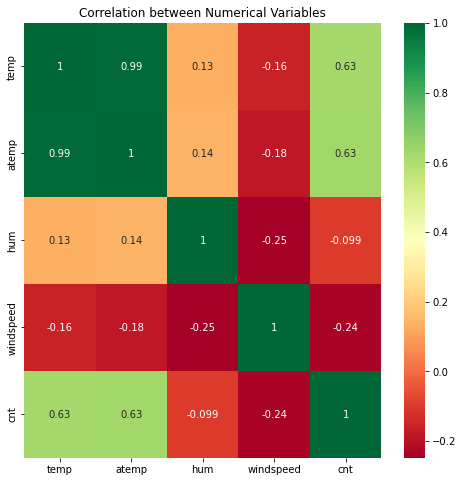

In [25]:
#Checking the correlation between the numerical variables
df_corr = df[['temp','atemp','hum','windspeed','cnt']].corr()
plt.figure(figsize = (8,8))
sns.heatmap(df_corr, annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

**There is linear relationship between temp and atemp. Both the parameters cannot be used in the model due to multicolinearity. Therefore, we can decide which parameters to keep based on VIF and p-value w.r.t other variables.**

# Step 3: Preparing the Data for Linear Regression

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
#Create Dummy variables for season, month, weekday, & weathersit variables.
season_df = pd.get_dummies(df.season, drop_first=True)
mnth_df = pd.get_dummies(df.mnth, drop_first=True)
weekday_df = pd.get_dummies(df.weekday, drop_first=True)
weathsit_df = pd.get_dummies(df.weathersit)

In [28]:
#Merge the dummy variables into original dataframe
df_new = pd.concat([df, season_df, mnth_df, weekday_df, weathsit_df], axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

In [30]:
#Drop unnecessary columns as we have already created dummy variables out of it.
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df_new.head(20)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,1,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,0,0,0,0,1,1,0,0


In [31]:
#Check the column info of new dataframe 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [32]:
# splitting the dataframe into Train and Test datasets
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [33]:
#Check the shape of training dataset
df_train.shape

(510, 31)

In [34]:
#Check the shape of testing dataset
df_test.shape

(220, 31)

In [35]:
#Using MinMaxScaler to Rescale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
#Verifying the head of dataset before scaling.
df_train.head(20)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.09770,72.9583,14.707907,1683,0,1,...,0,0,0,1,0,0,0,0,0,1
580,1,0,0,32.526653,37.56335,61.3333,17.249686,6824,0,0,...,0,1,0,0,0,0,0,1,0,0
500,1,0,1,26.103347,29.79875,69.7917,8.208304,7424,0,1,...,0,0,0,0,0,0,0,1,0,0
479,1,0,1,19.543347,23.51585,42.7917,7.959064,6196,0,1,...,0,0,0,0,0,0,0,1,0,0
472,1,0,1,18.996653,22.85190,56.9167,11.250104,4367,0,1,...,0,0,0,0,0,0,0,0,0,1
455,1,0,0,17.459153,20.86435,67.6250,11.541889,6041,0,1,...,0,0,0,0,0,1,0,0,0,1


In [37]:
#Applying scaler() to the primary dependent numerical variables columns:-
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,1


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


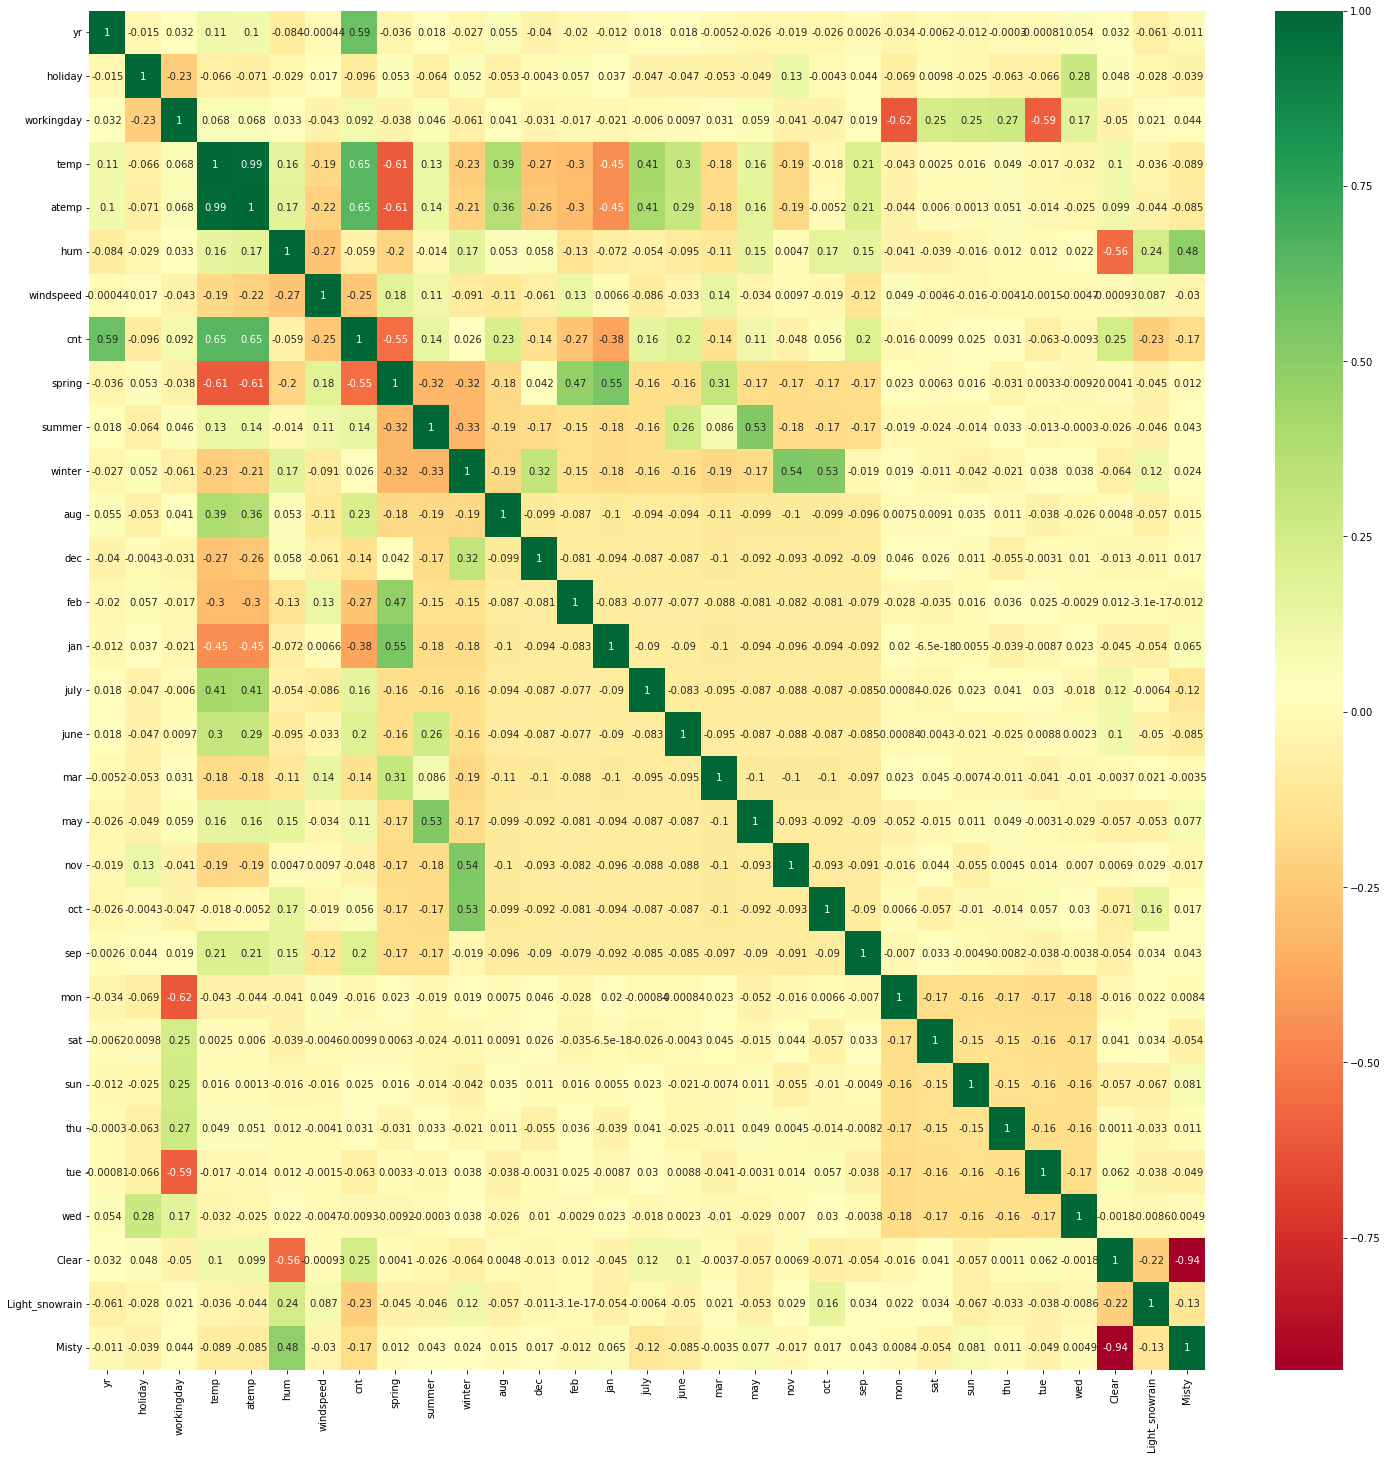

In [39]:
#Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

**`cnt` seems to have correlation with `yr` variable and `temp`. Similarly, `Misty` and `hum` show some correlation. `Spring` season with `Jan` and `Feb` month, `Summer` season with `May` month and `Winter` season with `Oct` and `Nov` months show good correlation.**

# Step5: Building the Linear model

In [40]:
#Importing the required packages from libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#Defining the X & y training data axes
y_train = df_train.pop('cnt')
X_train = df_train

In [41]:
#Recursive Feature Elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
#List of variables selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 5),
 ('feb', False, 13),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 10),
 ('mar', False, 9),
 ('may', False, 14),
 ('nov', False, 4),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 15),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', True, 1),
 ('wed', False, 16),
 ('Clear', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [43]:
#Selecting the selected variable via RFE in column list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'july', 'sep', 'mon', 'tue', 'Clear', 'Light_snowrain',
       'Misty'],
      dtype='object')


In [44]:
#Checking which columns have been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'sat', 'sun', 'thu', 'wed'],
      dtype='object')

In [45]:
#Function to calculate VIFs and print them:- takes the columns, for which VIF is to be calcualted, as a parameter
def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [46]:
#Dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
#Calculate VIF
get_vif(X_train_rfe)

,Features,VIF
1,holiday,inf
2,workingday,inf
10,mon,inf
11,tue,inf
12,Clear,inf
13,Light_snowrain,inf
14,Misty,inf
3,temp,2.99
6,spring,2.55
4,hum,1.89


# Step 5: Building a linear model

In [48]:
#Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          9.38e-190
Time:                        00:52:35   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1275      0.023      5.

In [49]:
#As holiday variable shows high VIF value hence we can drop it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

#Run the function to calculate VIF for the new model
get_vif(X_train_new)

,Features,VIF
11,Clear,62.30
13,Misty,40.71
1,workingday,9.07
9,mon,6.06
10,tue,5.74
12,Light_snowrain,5.03
2,temp,2.99
5,spring,2.55
3,hum,1.89
6,winter,1.78


In [50]:
#Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          9.38e-190
Time:                        00:52:35   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0997      0.033      3.

In [51]:
#We can drop Clear variable as it has very high VIF
X_train_new = X_train_new.drop(['Clear'], axis = 1)

#Run the function to calculate VIF for the new model
get_vif(X_train_new)

,Features,VIF
3,hum,29.19
2,temp,17.25
1,workingday,16.91
9,mon,4.57
4,windspeed,4.52
10,tue,4.45
5,spring,2.79
12,Misty,2.28
6,winter,2.14
0,yr,2.08


In [52]:
#Building 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          9.38e-190
Time:                        00:52:35   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2355      0.040      5.

In [53]:
#We can drop humidity variable as it has very high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

#Run the function to calculate VIF for the new model
get_vif(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,mon,3.77
9,tue,3.54
4,spring,2.44
0,yr,2.07
5,winter,1.78
11,Misty,1.58
6,july,1.37


In [54]:
#Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.26e-187
Time:                        00:52:35   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1553      0.035      4.

In [55]:
#We can drop workingday variable as it has high VIF
X_train_new = X_train_new.drop(['workingday'], axis = 1)

#Run the function to calculate VIF for the new model
get_vif(X_train_new)

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
10,Misty,1.52
4,winter,1.41
5,july,1.35
7,mon,1.22
8,tue,1.21
6,sep,1.20


**VIF value now seems to be good as it came below 5.**

In [56]:
#Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.84e-185
Time:                        00:52:35   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2558      0.024     10.

In [57]:
#We can drop mon variable as it has high p-value
X_train_new = X_train_new.drop(['mon'], axis = 1)

#Run the function to calculate VIF for the new model
get_vif(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.64
9,Misty,1.52
4,winter,1.40
5,july,1.35
6,sep,1.20
7,tue,1.17
8,Light_snowrain,1.08


**Removing mon variable doesn't seem to have affected the VIFs much. Let's build another model**

In [58]:
#Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.75e-186
Time:                        00:52:36   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2586      0.024     10.

**We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.**<br>
**F-Statistics value of 247.6 (which is >>> 1) and it's p-value of 2.75e-186 which almost equals to zero, states that the overall model is significant.**

In [59]:
#Checking the parameters and their coefficient values
lr_6.params

const             0.258592
yr                0.234574
temp              0.449323
windspeed        -0.141044
spring           -0.114692
winter            0.043831
july             -0.069784
sep               0.052198
tue              -0.044329
Light_snowrain   -0.285866
Misty            -0.079670
dtype: float64

# Step 6: Residual Analysis of the train data and validation

In [60]:
X_train_lm_6

,const,yr,temp,windspeed,spring,winter,july,sep,tue,Light_snowrain,Misty
576,1.0,1,0.815169,0.264686,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,1,0,0,0,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,0,0,1


In [61]:
y_train_pred = lr_6.predict(X_train_lm_6)

**Normality of error terms**

Text(0.5, 0, 'Errors')

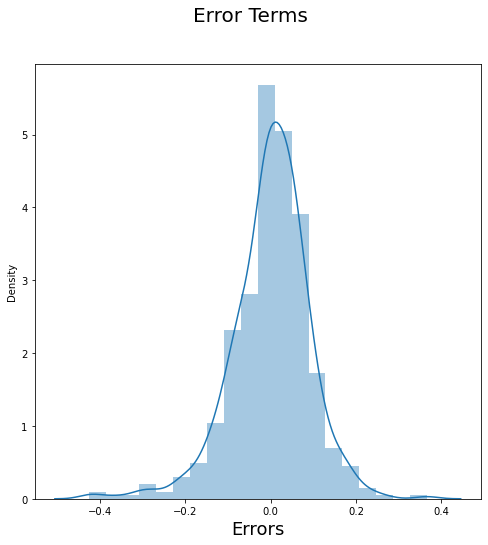

In [62]:
#Plotting the histogram of the error terms
fig = plt.figure(figsize=(8,8))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

**Error terms seem to follow normal distribution**

In [63]:
#Checking for Multicollinearity
get_vif(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.64
9,Misty,1.52
4,winter,1.40
5,july,1.35
6,sep,1.20
7,tue,1.17
8,Light_snowrain,1.08


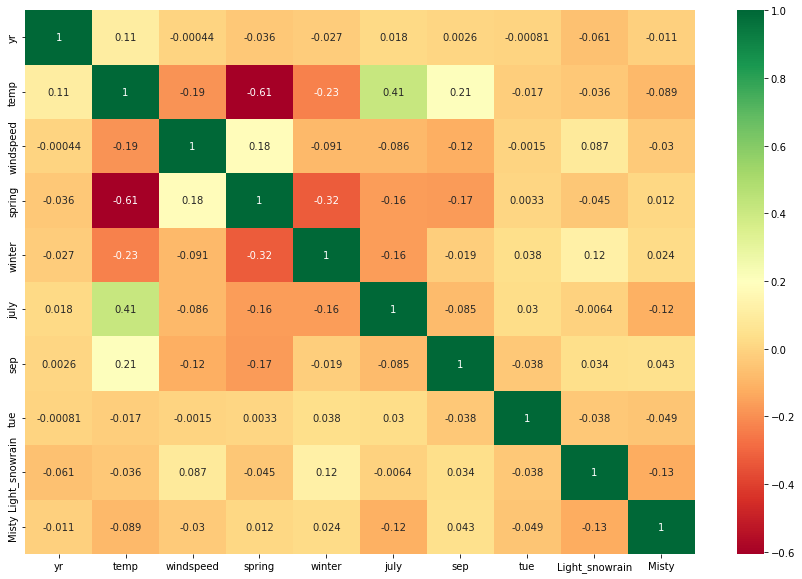

In [64]:
#Checking the Multicollinearity via Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**VIF values are less than 5 which is good and there is no multicolinearity observed in above Heatmap.**<br>
**Now, let's check Linearity between the variables by using Scatter plot.**

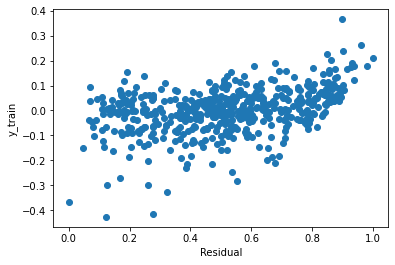

In [65]:
#Linearity check using scatter plot
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [66]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8322849355208716

**We can see that the R2 value matches perfectly with our last model.<br>
Now let's check for Homoscedasticity.**

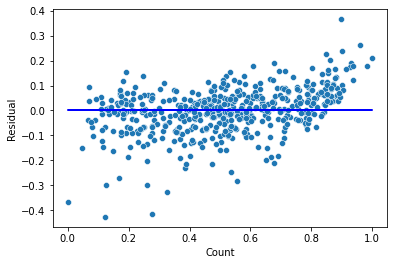

In [67]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-b')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**No visible pattern observed from above plot for residuals.**<br>
**To check for Independence of Residuals, we can observe that the Durbin-Watson value of our final model lr_6 is 1.985, which is approx. equal to 2,  signifying that there is no autocorrelation.**

# Step 7: Making Predictions Using the Final Model

**Now that we have fitted the model and checked the normality of error terms, let's make predictions using the final 6th model.**

In [68]:
#Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,1,0,0


In [69]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sep,mon,sat,sun,thu,tue,wed,Clear,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.654545,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
col1 = X_train_new.columns
X_test = X_test[col1]

#Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [72]:
y_pred = lr_6.predict(X_test_lm_6)

In [73]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8092

# Step 8: Model Evaluation

**Let's now plot the graph for actual versus predicted values.**

Text(0, 0.5, 'y_pred')

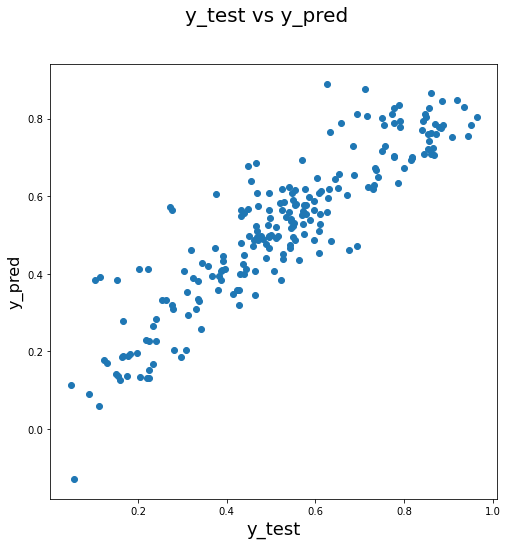

In [74]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [75]:
round(lr_6.params,4)

const             0.2586
yr                0.2346
temp              0.4493
windspeed        -0.1410
spring           -0.1147
winter            0.0438
july             -0.0698
sep               0.0522
tue              -0.0443
Light_snowrain   -0.2859
Misty            -0.0797
dtype: float64

**We can see that the equation of our best fitted line is:**

$ cnt = 0.2586 + 0.2346  \times  year + 0.4493  \times  temp - 0.1410 \times windspeed - 0.1147 \times spring + 0.0438 \times winter - 0.0698 \times july + 0.0522 \times sep - 0.0443 \times tue - 0.2859 \times Light_snowrain - 0.0797 \times Misty $

In [76]:
#Calculating Adjusted R2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8001


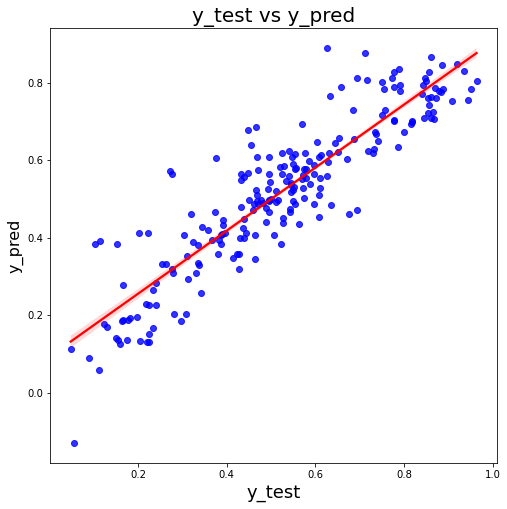

In [77]:
#Visualizing the fit on the test data i.e. a Regression Plot
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# `CONCLUSION`
## Comparison between Training and Testing datasets:
- Train dataset R2          : **0.832**
- Train dataset Adjusted R2 : **0.829**
- Test dataset R2           : **0.8092**   
- Test dataset Adjusted R2  : **0.8001**

### Demand of bikes depend on `year`, `temp`, `windspeed`, `spring`, `winter`, `july`, `sep`, `tue`, `Light_snowrain`, & `Misty`.